<a href="https://colab.research.google.com/github/Touhou09/modelImplementTrial/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


퍼셉트론은 가중치를 사람이 수동으로 설치해야 하지만 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습한다.




# 퍼셉트론에서 신경망으로

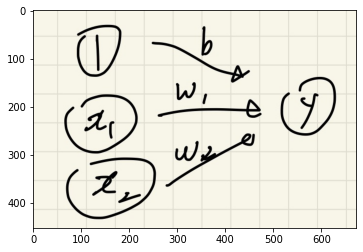

In [70]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.imshow(imread('/content/신경망-1.jpg'))

위 그림과 같이 퍼셉트론과 크게 다르지 않아 보이고 실제로도 뉴런이 연결되는 방식은 퍼셉트론과 동일하다.



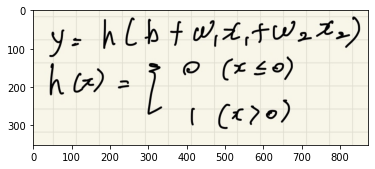

In [71]:
plt.imshow(imread('/content/신경망-2.jpg'))

위의 식처럼 입력신호의 총합을 출력신호로 변환하는 함수를 '활성화 함수'라고 한다.

위의 식은 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리되어 아래와 같은 2개의 식으로 나눌 수 있다

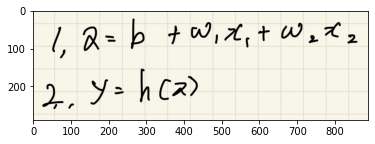

In [72]:
plt.imshow(imread('/content/신경망-3.jpg'))

식 1은 가중치가 달린 입력 신화와 편향의 총합을 계산하고 이를 a라고 한다.

식 2는 a를 함수 h()에 넣어 y를 출력한다.

식 1과 2를 그림으로 표현하면 아래와 같다.

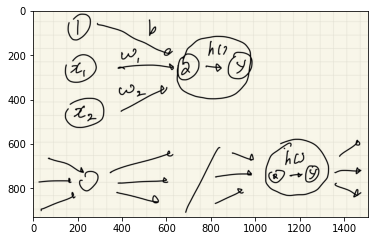

In [73]:
plt.imshow(imread('/content/신경망-4.jpg'))

위 그림에서 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과해 y라는 노드로 변환된다.


# 활성화 함수

활성화 함수가 임계값을 경계로 출력이 바뀌는데, 이런 함수를 '계단함수'라고 한다.

즉, 퍼셉트론은 계단함수를 이용한다.

신경망은 계단함수 외에도 다른 함수를 이용할 수 있다.

* 시그모이드 함수


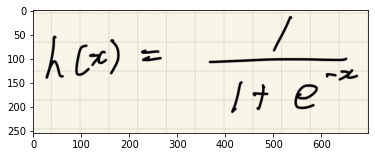

In [74]:
plt.imshow(imread('/content/신경망-5.jpg'))

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에게 전달한다.
퍼셉트론과의 차이는 활성화 함수 뿐이다.
그 외에 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 퍼셉트론과 같다.


* 계단 함수
계단 함수는 입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수이다.
식을 코드로 구현하면 아래와 같다.

In [75]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

넘파이 배열을 지원하도록 수정하면 아래와 같다.

In [76]:
def step_function_numpy(x):
  y = x > 0
  return y.astype(np.int)
# numpy의 자료형을 변환할때는 astype()으로 변형한다

계단 함수의 그래프를 직접 그리면 아래와 같다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


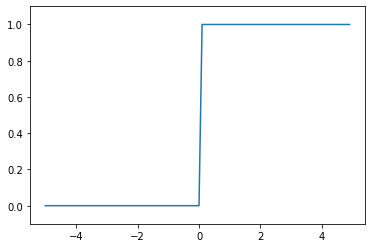

In [77]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

시그모이드 함수 구현은 아래와 같다

In [78]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
# exp(-x)는 e^-x 와 같다

x = np.array([-1.0,1.0,2.0])

sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

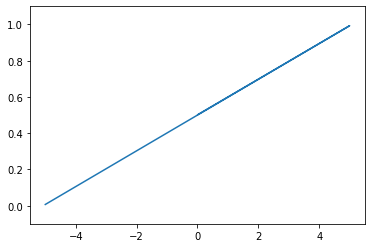

In [79]:
x = np.array([-5.0,5.0,0.01])
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()
# 그래프가 꼬여서 나옴

* 시그모이드 함수와 계단 함수의 비교

두 함수의 차이는 연속적인지 아닌지 이고, 두 함수의 공통점은 입력이 아무리 크거나 작아도 출력이 0과 1로 수렴한다는 점이다.

* 비선형 함수

계단 함수와 시그모이드 함수 둘 다 비선형 함수이다.

신경망에서는 비선형 함수를 활성화 함수를 사용한다.

그 이유는 선형 함수는 아무리 층을 깊게 해도 은닉층이 없는 네트워크와 차이가 없다.

즉, 은닉층이 있는 네트워크를 구성하기 위해서는 비선형 함수를 사용해서 구성해야한다.



* ReLU 함수
최근에 시그모이드 대신 이용하는 함수이다.

ReLU는 입력이 0을 넘으면 그 값을 출력하고 0 이하이면 0을 출력하는 함수이다.

수식은 아래와 같다.

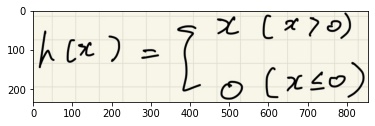

In [80]:
plt.imshow(imread('/content/신경망-6.jpg'))

식 자체가 간단하므로 아래와 같이 간단하게 표현 가능하다.

In [81]:
def ReLU(x):
  return np.maximum(0,x)

# 다차원 배열의 계산



In [82]:
# 1차원 배열
A = np.array([1,2,3,4])

print(A)

np.ndim(A)

A.shape

A.shape[0]


[1 2 3 4]


4

In [83]:
# 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(B)

np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [84]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
A.shape

B = np.array([[5,6],[7,8]])
B.shape

np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [85]:
# 행렬의 형식이 다른 경우의 곱
A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape

np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [86]:
# 두 행렬의 대응하는 차원 수가 동일해야한다.

C = np.array([[1,2],[3,4]])
C.shape

# np.dot(A,C)

(2, 2)

# 3층 신경망 구현하기

3층 신경망은 입력층 2개, 은닉층 3개, 두번째 은닉층 2개, 출력층 2개로 구성된다.


In [87]:
# 3층 신경망 그림

입력층의 노드는 각 은닉층의 노드에 모두 연결된다. 

그 신호의 전달을 수식으로 표현하면 아래와 같다.

In [88]:
# 신경망 노드 연결 그림 + 수식

위 식을 구현하면 아래와 같다.

In [89]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이어지는 1층에서 2층으로 전달하는 과정과 그 구현을 보자

In [90]:
# 1층에서 2층으로 신호 전달

In [91]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)



2층에서 출력층으로의 신호 전달도 활성화 함수를 제외하면 위의 과정과 같다.

In [92]:
def identity_function(x):
  return x

# 흐름상 정의했지만 굳이 정의하지 않아도 상관없다
# 정의 안한경우 Y = A3


W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

위에서 구현한 함수들을 정리하면 아래와 같다.

In [93]:
def init_network():
  network = {}
  network['W1'] = np.array([[1,3,5],[2,4,6]])
  network['b1'] = np.array([1,2,3])
  network['W2'] = np.array([[1,4],[2,5],[3,6]])
  network['b2'] = np.array([1,2])
  network['W3'] = np.array([[1,3],[2,4]])
  network['b3'] = np.array([1,2])

  return network

def forward(network, x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  z3 = sigmoid(a3)
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1,0.5])
y = forward(network,x)
print(y)






[3.99904285 8.99712866]


여기서 int과 forward 함수는 각각 아래 의미를 가진다.

init : 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장한다. 딕셔너리 변수 network에는 각 층에 필요한 매개변수(편향, 가중치)를 저장한다.

forward : 입력신호를 출력신호로 변환하는 처리과정



# 출력층 설계하기

신경망은 분류, 회귀에서 모두 이용 가능하다.

문제의 종류에 따라 사용하는 활성화 함수가 달라지는데

일반적으로는 회귀에 항등함수, 분류에 소프트맥스 함수를 사용한다.

* 항등함수와 소프트맥스 함수의 구현

항등함수의 항등은 입력과 출력이 항상 같다는 뜻의 항등이다.

그래서 출력층에서 항등함수를 사용하면 입력신호가 그대로 출력신호가 된다.

항등함수의 처리는 신경망 그림으로는 아래와 같다. 항등함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 그린다.

In [94]:
# 항등함수 그림

* 소프트 맥스

소프트맥스 함수의 식은 아래와 같다.

In [95]:
# 소프트맥스 식/그림

식에서 n은 출력층의 뉴런 수, y_k는 그 중 k번째 출력임을 뜻한다.

위의 식의 경우에서는 소프트맥스 함수의 분자는 입력신호 a_k의 지수함수, 분모는 모든 입력 신호의 지수함수의 합으로 구성된다.

위 식을 파이썬으로 구현하면 아래와 같다.

In [96]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [97]:
# 위의 식을 함수로 짜놓는다
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a


위의 식에서 값이 너무 커지면 오버플로우가 발생하므로 결과 수치가 불안정해진다.

이를 수식과 구현의 개선을 하면 아래와 같다.

In [98]:
# 수식

위의 식에서 정수 C는 오버플로우를 막을 목적으로 사용될 때 최댓값을 넣는다.

이를 포함해서 구현하면 아래와 같다.

In [99]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y  

* softmax()의 특징

소프트맥스 함수의 출력은 0에서 1.0까지의 실수이다.

또한, 소프트맥스 함수의 출력의 총합은 1이다.

출력의 총합이 1이므로 함수의 출력을 '확률'로 계산이 가능하다.

아래의 예시에서 y[0]의 확률은 0.018, y[2]의 확률은 0.737이므로 2번째 원소의 확률이 가장 높으므로 답은 2번째 클래스임을 유추 가능하다.

또는 각각 73%로 2번째, 24%로 1번째, 1%의 확률로 0번째 클래스 처럼 확률적인 결론 또한 낼 수 있다.

즉, 소프트맥스 함수를 이용함으로써 문제를 통계적으로 대응 가능해진다.



In [100]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


주의점으로 소프트맥스 함수를 적용해도 지수함수가 단조 증가 함수이기 때문에 각 원소의 대소관계는 변하지 않는다.

실제로 a에서 원소들의 대소관계가 y에서의 대소관계와 동일하다.

신경망을 통한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.

그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.

결과적으로는 신경망으로 분류할때 출력층의 소프트맥스 함수를 생략해도 된다.

* 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야한다.

분류에서는 분류하고 싶은 클래스의 수로 정하는게 일반적이다.

예를들면 숫자 0~9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정해야한다.



# 손글씨 숫자 인식

MNIST : 실험용 데이터로 자주 쓰는 손글씨 숫자 이미지 집합  
0~9까지의 숫자 이미지로 구성되며 이미지를 사용해 모델을 학습하고 시험 이미지를 얼마나 정확하게 분류하는지를 평가한다.   
28*28 크기의 이미지이고 각 이미지마다 실제 의미하는 숫자가 레이블로 붙는다.  



In [126]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DLscratch/deep-learning-from-scratch-master/ch03/dataset/')

from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [120]:
'''
위에서 학습한 모델을 이용해 이미지를 불러온다
'''

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DLscratch/deep-learning-from-scratch-master/ch03/dataset/')

from mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

# print(img.shape)
img = img.reshape(28, 28)
# print(img.shape)

img_show()
# 이미지 안나옴

5


* 신경망의 추론처리

입력층, 출력층을 구현하여 추론을 수행하는 신경망을 구현한다.

입력층 : 28 * 28 = 784  
출력층 : 10

은닉층은 총 2개로 첫번째 은닉층에는 50개의 뉴런을, 두번째 은닉층에는 100개의 뉴런은 배치한다.(은닉층의 뉴런은 임의로 정한 값이다.)

세 함수 get_data(), init_network(), predict()를 정의한다.

In [136]:
import pickle
def get_data():
  (x_train, t_train), (x_test,t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open('/content/drive/MyDrive/Colab Notebooks/DLscratch/deep-learning-from-scratch-master/ch03/dataset/mnist.pkl', 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [140]:
x, t = get_data()
network = init_network()


print(x.shape)




accuracy_cnt = 0
'''
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print(str(float(accuracy_cnt)/len(x)))
'''

(10000, 784)


'\nfor i in range(len(x)):\n  y = predict(network, x[i])\n  p = np.argmax(y)\n  if p == t[i]:\n    accuracy_cnt += 1\n\nprint(str(float(accuracy_cnt)/len(x)))\n'

In [141]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network,x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p==t[i:i+batch_size])

print(str(float(accuracy_cnt)/len(x)))

KeyError: ignored

# 이번 장에서 배운 내용
* 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
* 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
* 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
* 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
* 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
* 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.
